#Create a new dataset with only common columns

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, balanced_accuracy_score, confusion_matrix

from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load datasets (replace 'file1.csv', 'file2.csv', 'file3.csv' with actual file paths)
df1 = pd.read_csv("/content/drive/MyDrive/IoT Dataset 2024/IOT-Approch-02/3_CIC IoT-DIAD 2024.csv")
df2 = pd.read_csv("/content/drive/MyDrive/IoT Dataset 2024/IOT-Approch-02/2_CIC-BCCC-NRC 2024.csv")
df3 = pd.read_csv("/content/drive/MyDrive/IoT Dataset 2024/IOT-Approch-02/1_CIC APT IIoT Dataset 2024.csv")

# Define mapping dictionary
column_mapping = {
    "flow_duration": "Flow Duration",
    "Flow Duration": "Flow Duration",
    "Source IP": "Src IP",
    "Src IP": "Src IP",
    "Source Port": "Src Port",
    "Src Port": "Src Port",
    "Destination IP": "Dst IP",
    "Dst IP": "Dst IP",
    "Destination Port": "Dst Port",
    "Dst Port": "Dst Port",
    "Protocol Type": "Protocol",
    "Protocol": "Protocol",
    "ts": "Timestamp",
    "Timestamp": "Timestamp",
    "Rate": "Flow Bytes/s",
    "Flow Bytes/s": "Flow Bytes/s",
    "Flow Packets/s": "Flow Packets/s",
    "fin_flag_number": "FIN Flag Count",
    "FIN Flag Count": "FIN Flag Count",
    "syn_flag_number": "SYN Flag Count",
    "SYN Flag Count": "SYN Flag Count",
    "rst_flag_number": "RST Flag Count",
    "RST Flag Count": "RST Flag Count",
    "psh_flag_number": "PSH Flag Count",
    "PSH Flag Count": "PSH Flag Count",
    "ack_flag_number": "ACK Flag Count",
    "ACK Flag Count": "ACK Flag Count",
    "urg_flag_number": "URG Flag Count",
    "URG Flag Count": "URG Flag Count",
    "cwr_flag_number": "CWR Flag Count",
    "CWR Flag Count": "CWR Flag Count",
    "ece_flag_number": "ECE Flag Count",
    "ECE Flag Count": "ECE Flag Count",
    "flow_active_time": "Active Mean",
    "Active Mean": "Active Mean",
    "flow_idle_time": "Idle Mean",
    "Idle Mean": "Idle Mean"
}

# Rename columns in each dataset
df1.rename(columns=column_mapping, inplace=True)
df2.rename(columns=column_mapping, inplace=True)
df3.rename(columns=column_mapping, inplace=True)

# Find common columns among all three datasets
common_columns = list(set(df1.columns) & set(df2.columns) & set(df3.columns))

# Create a new dataset with only common columns
common_df = pd.concat([df1[common_columns], df2[common_columns], df3[common_columns]], ignore_index=True)

# Save the new dataset to a CSV file
common_df.to_csv("common_dataset.csv", index=False)

# Display the first few rows of the new dataset
print("Common dataset created successfully. Preview:")
print(common_df.head())


Common dataset created successfully. Preview:
   Flow Bytes/s           Src IP  PSH Flag Count  Dst Port  CWR Flag Count  \
0   2145.119852  192.168.137.133               0        53               0   
1    771.665834  192.168.137.133               0        53               0   
2    944.301445  192.168.137.227               0        53               0   
3   4376.367615   192.168.137.41               0        53               0   
4      5.776885  192.168.137.245               0     32100               0   

   ACK Flag Count           Label  FIN Flag Count  Src Port  Protocol  \
0               0  Benign Traffic               0     53083        17   
1               0  Benign Traffic               0     34173        17   
2               0  Benign Traffic               0     50664        17   
3               0  Benign Traffic               0     60462        17   
4               0  Benign Traffic               0     19274        17   

   Flow Duration  SYN Flag Count  URG Flag Cou

#show Data

In [ ]:
df=pd.read_csv("common_dataset.csv")
df

<ipython-input-5-73c8cb8fe4c7>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("common_dataset.csv")


,Flow Bytes/s,Src IP,PSH Flag Count,Dst Port,CWR Flag Count,ACK Flag Count,Label,FIN Flag Count,Src Port,Protocol,Flow Duration,SYN Flag Count,URG Flag Count,Idle Mean,Timestamp,ECE Flag Count,RST Flag Count,Dst IP,Active Mean
0,2145.119852,192.168.137.133,0,53,0,0,Benign Traffic,0,53083,17,4.009100e+04,0,0,0.000000e+00,7/10/2022 19:17,0,0,192.168.137.1,0.000000
1,771.665834,192.168.137.133,0,53,0,0,Benign Traffic,0,34173,17,1.140390e+05,0,0,0.000000e+00,7/10/2022 19:45,0,0,192.168.137.1,0.000000
2,944.301445,192.168.137.227,0,53,0,0,Benign Traffic,0,50664,17,1.313140e+05,0,0,0.000000e+00,7/10/2022 16:17,0,0,8.8.8.8,0.000000
3,4376.367615,192.168.137.41,0,53,0,0,Benign Traffic,0,60462,17,1.645200e+04,0,0,0.000000e+00,7/10/2022 18:28,0,0,192.168.137.1,0.000000
4,5.776885,192.168.137.245,0,32100,0,0,Benign Traffic,0,19274,17,1.004001e+08,0,0,2.493718e+07,7/10/2022 21:12,0,0,47.254.89.110,128562.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34103,527.429292,172.16.67.128,0,80,0,1,Benign Traffic,0,48884,6,1.060806e+01,0,0,5.640980e-04,1701727710,0,0,93.93.128.193,10.608057
34104,527.316570,93.93.128.193,1,48884,0,1,Benign Traffic,0,80,6,1.035621e+01,0,0,2.458811e-03,1701727710,0,0,172.16.67.128,10.356208
34105,526.610960,172.16.67.128,0,80,0,1,Benign Traffic,0,48884,6,7.629921e+00,0,0,1.540180e-04,1701727707,0,0,93.93.128.193,7.629921
34106,527.953784,93.93.128.193,1,48884,0,1,Benign Traffic,0,80,6,4.106420e+00,0,0,2.233028e-03,1701727704,0,0,172.16.67.128,4.106420


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34108 entries, 0 to 34107
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flow Bytes/s    34104 non-null  float64
 1   Src IP          34108 non-null  object 
 2   PSH Flag Count  34108 non-null  int64  
 3   Dst Port        34108 non-null  int64  
 4   CWR Flag Count  34108 non-null  int64  
 5   ACK Flag Count  34108 non-null  int64  
 6   Label           34108 non-null  object 
 7   FIN Flag Count  34108 non-null  int64  
 8   Src Port        34108 non-null  int64  
 9   Protocol        34108 non-null  int64  
 10  Flow Duration   34108 non-null  float64
 11  SYN Flag Count  34108 non-null  int64  
 12  URG Flag Count  34108 non-null  int64  
 13  Idle Mean       34108 non-null  float64
 14  Timestamp       34108 non-null  object 
 15  ECE Flag Count  34108 non-null  int64  
 16  RST Flag Count  34108 non-null  int64  
 17  Dst IP          34108 non-null 

In [ ]:
df.shape[1]

19

In [ ]:

df['Label'].unique()

array(['Benign Traffic', 'DDoS-HTTP_Flood', 'DDoS-ACK_Fragmentation',
       'DDoS-ICMP_Flood', 'Mirai-greeth_flood', 'VulnerabilityScan',
       'MITM-ArpSpoofing', 'DNS_Spoofing', 'SqlInjection',
       'DDoS ICMP Flood', 'DDoS UDP Flood', 'DoS ICMP Flood',
       'DoS UDP Flood', 'MITM ARP Spoofing', 'MQTT DDoS Publish Flood',
       'MQTT DoS Connect Flood', 'MQTT DoS Publish Flood',
       'MQTT Malformed', 'Recon OS Scan', 'Recon Ping Sweep',
       'Recon Port Scan', 'Recon Vulnerability Scan', 'discovery',
       'collection', 'exfiltration', 'credential access',
       'lateral movement', 'cleanup', 'persistence',
       'command and control'], dtype=object)

In [ ]:
print(df['Label'].value_counts())

Label
Benign Traffic              12000
DoS UDP Flood                2008
DoS ICMP Flood               1004
Recon Vulnerability Scan     1004
Recon Port Scan              1004
Recon OS Scan                1004
MQTT Malformed               1004
DDoS-HTTP_Flood              1004
MQTT DDoS Publish Flood      1004
MITM ARP Spoofing            1004
MQTT DoS Connect Flood       1004
DDoS UDP Flood               1004
VulnerabilityScan            1004
DDoS-ACK_Fragmentation       1004
DDoS ICMP Flood              1004
Mirai-greeth_flood           1004
DDoS-ICMP_Flood              1004
MITM-ArpSpoofing             1004
DNS_Spoofing                 1004
SqlInjection                 1004
MQTT DoS Publish Flood        953
collection                    460
cleanup                       192
discovery                     138
Recon Ping Sweep               71
credential access              58
command and control            56
persistence                    44
exfiltration                   42
lateral 

<ipython-input-10-d8510c4d46ff>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=common_df, y="Label", palette=palette)


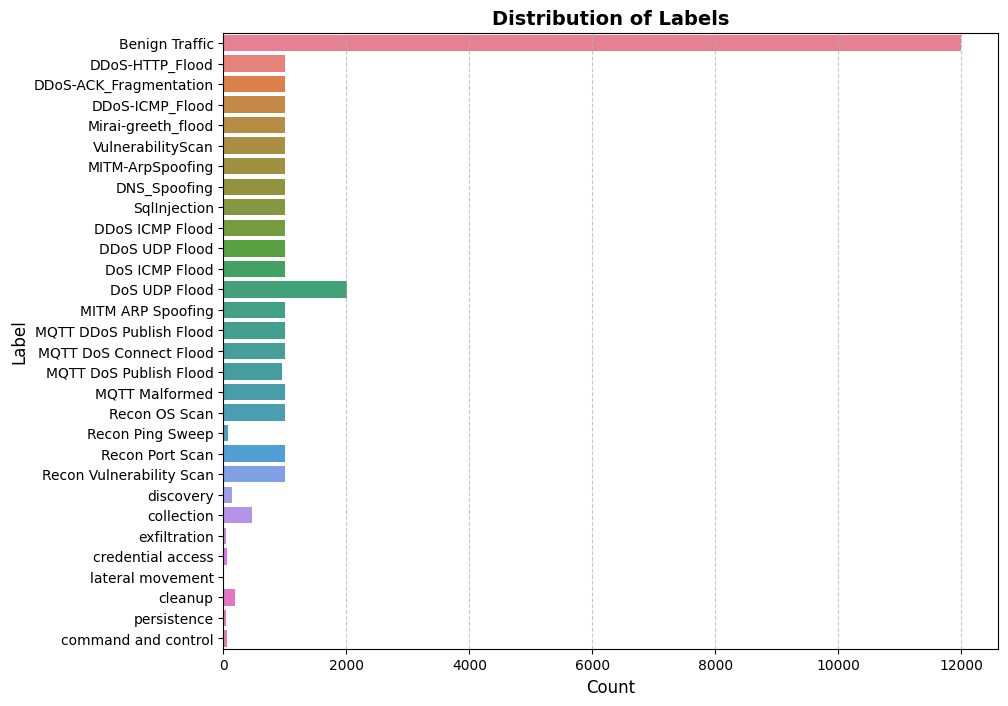

In [ ]:
# Set figure size
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

unique_labels = common_df["Label"].unique()
palette = sns.color_palette("husl", len(unique_labels))

# Plot label distribution (horizontal)
sns.countplot(data=common_df, y="Label", palette=palette)

# Add title and labels
plt.title("Distribution of Labels", fontsize=14, fontweight="bold")
plt.ylabel("Label", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# pre-processing




In [ ]:
from sklearn.preprocessing import LabelEncoder

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df["Minute"] = df["Timestamp"].dt.minute
df["Second"] = df["Timestamp"].dt.second

df.drop(columns=["Timestamp"], inplace=True)

label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

df["Src IP"] = df["Src IP"].astype("category").cat.codes
df["Dst IP"] = df["Dst IP"].astype("category").cat.codes

df.fillna(df.median(), inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34108 entries, 0 to 34107
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flow Bytes/s    34108 non-null  float64
 1   Src IP          34108 non-null  int16  
 2   PSH Flag Count  34108 non-null  int64  
 3   Dst Port        34108 non-null  int64  
 4   CWR Flag Count  34108 non-null  int64  
 5   ACK Flag Count  34108 non-null  int64  
 6   Label           34108 non-null  int64  
 7   FIN Flag Count  34108 non-null  int64  
 8   Src Port        34108 non-null  int64  
 9   Protocol        34108 non-null  int64  
 10  Flow Duration   34108 non-null  float64
 11  SYN Flag Count  34108 non-null  int64  
 12  URG Flag Count  34108 non-null  int64  
 13  Idle Mean       34108 non-null  float64
 14  ECE Flag Count  34108 non-null  int64  
 15  RST Flag Count  34108 non-null  int64  
 16  Dst IP          34108 non-null  int16  
 17  Active Mean     34108 non-null 

#SMOT and ADASYN|

Class distribution before SMOTE:
Class 9: 803 samples
Class 12: 803 samples
Class 0: 9600 samples
Class 3: 803 samples
Class 8: 1607 samples
Class 16: 803 samples
Class 26: 111 samples
Class 5: 803 samples
Class 18: 803 samples
Class 11: 803 samples
Class 20: 803 samples
Class 1: 803 samples
Class 19: 803 samples
Class 15: 803 samples
Class 23: 368 samples
Class 10: 803 samples
Class 13: 763 samples
Class 7: 803 samples
Class 2: 803 samples
Class 14: 803 samples
Class 17: 57 samples
Class 21: 803 samples
Class 6: 803 samples
Class 4: 803 samples
Class 27: 34 samples
Class 24: 45 samples
Class 22: 154 samples
Class 25: 47 samples
Class 28: 11 samples
Class 29: 35 samples
Checking for NaN or Inf values in X_train_smote: False False
Checking for NaN or Inf values in X_test: False False
Data preprocessing completed successfully!


<ipython-input-31-99437a584fd2>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_data, order=sorted(counter.keys()), palette='viridis')


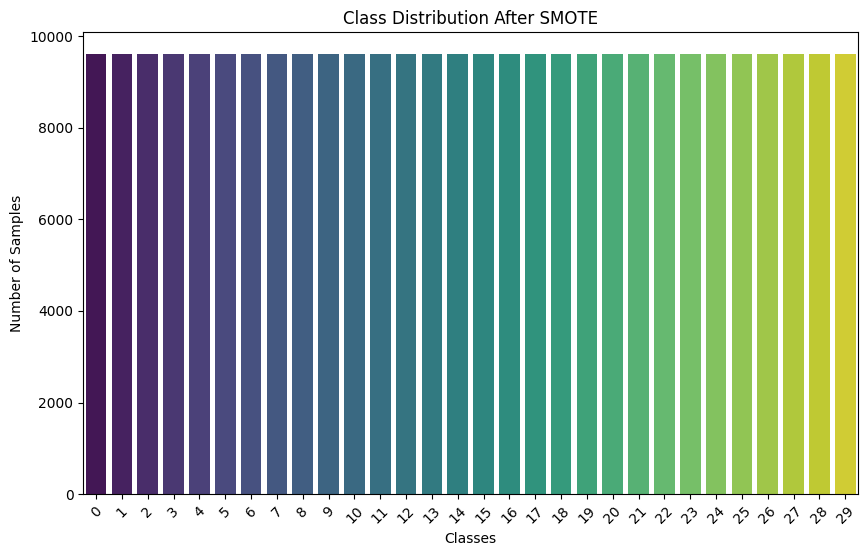

Training Logistic Regression with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results for Logistic Regression:
class29
Accuracy: 0.6245968924069188
Precision: [0.88983856 0.75982533 0.52459016 0.31561462 0.77894737 1.
 0.44221106 0.98029557 0.22651007 0.98275862 0.26363636 0.75555556
 0.535      0.46931408 0.49142857 1.         0.99009901 1.
 0.99014778 1.         0.89686099 0.99447514 0.52054795 0.05660377
 0.         0.03225806 0.0952381  0.11428571 0.01136364 0.02054795]
Recall: [0.39041667 0.86567164 0.47761194 0.94527363 0.73631841 1.
 0.43781095 0.99004975 0.33665835 0.85074627 0.43283582 0.84577114
 0.53233831 0.68421053 0.85572139 1.         0.99502488 0.92857143
 1.         1.         0.99502488 0.89552239 1.         0.06521739
 0.         0.18181818 0.22222222 0.5        0.33333333 0.33333333]
Training Random Forest with SMOTE...

Results for Random Forest:
class29
Accuracy: 0.9731750219876869
Precision: [0.99288703 0.98974359 0.96135266 1.         1.         1.
 0.80193237 1.         0.92874109 1.         0.84102564 1.
 0.98       0.91836735 0.938461

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Results for AdaBoost:
class29
Accuracy: 0.19803576663734976
Precision: [0.95289855 0.         0.33333333 0.         1.         0.28190743
 0.04992548 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.5        0.5        0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Recall: [0.10958333 0.         1.         0.         0.41293532 1.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Training Extra Trees with SMOTE...

Results for Extra Trees:
class29
Accuracy: 0.969217238346526
Precision: [0.99497487 0.96       0.96482412 0.99497487 0.98994975 1.
 0.77674419 1.         0.91489362 0.99014778 0.81621622 1.
 0.98       0.94270833 0.92424242 1.         1.         1.
 1.         1.     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Results for XGBoost:
class29
Accuracy: 0.9769862210495456
Precision: [0.99664007 1.         1.         0.99497487 1.         1.
 0.77209302 1.         0.94736842 1.         0.85185185 0.99502488
 0.97014925 0.92857143 0.92346939 1.         1.         1.
 1.         1.         1.         1.         0.95       0.97777778
 1.         0.90909091 0.9        0.61538462 1.         1.        ]
Recall: [0.98875    1.         1.         0.98507463 0.9800995  1.
 0.82587065 1.         0.98753117 1.         0.80099502 0.99502488
 0.97014925 0.95789474 0.90049751 1.         0.99502488 1.
 1.         1.         1.         1.         1.         0.95652174
 0.81818182 0.90909091 1.         1.         1.         1.        ]
Training LightGBM with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3535
[LightGBM] [Info] Number of data points in the train set: 288000, number of used features: 21
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.40119

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Results for LightGBM:
class29
Accuracy: 0.9774259747874524
Precision: [0.99706745 1.         1.         1.         0.98989899 1.
 0.77102804 1.         0.94711538 1.         0.83068783 1.
 0.975      0.92346939 0.93434343 1.         1.         1.
 1.         1.         1.         1.         1.         0.95744681
 1.         1.         0.93103448 0.7        1.         1.        ]
Recall: [0.99166667 1.         1.         0.98507463 0.97512438 1.
 0.82089552 1.         0.98254364 1.         0.78109453 0.99502488
 0.97014925 0.95263158 0.92039801 1.         1.         1.
 1.         1.         1.         1.         1.         0.97826087
 0.81818182 0.90909091 1.         0.875      1.         0.88888889]
Training CatBoost with SMOTE...

Results for CatBoost:
class29
Accuracy: 0.9693638229258282
Precision: [0.99447279 0.9950495  1.         0.99       0.99481865 1.
 0.75342466 1.         0.89342404 1.         0.82352941 0.995
 0.9800995  0.85377358 0.95789474 1.         1.         0.9333333

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Results for SGDClassifier:
class29
Accuracy: 0.5299032541776605
Precision: [0.96315789 0.52336449 0.07556675 0.27431907 0.62732919 0.98514851
 0.34556575 0.91705069 0.4040404  0.09302326 0.38461538 0.60070671
 0.50777202 0.52892562 0.4507772  1.         0.45810056 0.25
 0.75968992 1.         0.93867925 0.98742138 0.51351351 0.
 0.01606426 0.         0.06629834 0.         0.         0.        ]
Recall: [0.305      0.8358209  0.29850746 0.70149254 0.50248756 0.99004975
 0.56218905 0.99004975 0.19950125 0.039801   0.32338308 0.84577114
 0.48756219 0.67368421 0.86567164 0.99502488 0.8159204  0.85714286
 0.97512438 0.9800995  0.99004975 0.78109453 1.         0.
 0.36363636 0.         0.44444444 0.         0.         0.        ]
Training MLPClassifier with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for MLPClassifier:
class29
Accuracy: 0.8822925828202873
Precision: [0.96677585 0.98019802 0.98029557 0.98989899 0.97894737 1.
 0.69444444 0.995      0.53571429 0.995      0.61290323 0.995
 0.93877551 0.61302682 0.68548387 1.         1.         1.
 0.9950495  1.         1.         0.995      0.84444444 0.875
 0.21875    0.26086957 0.28205128 0.05263158 0.66666667 0.88888889]
Recall: [0.86083333 0.98507463 0.99004975 0.97512438 0.92537313 0.99502488
 0.62189055 0.99004975 0.78553616 0.99004975 0.75621891 0.99004975
 0.68656716 0.84210526 0.84577114 1.         0.99502488 1.
 1.         1.         0.99502488 0.99004975 1.         0.30434783
 0.63636364 0.54545455 0.40740741 0.125      0.66666667 0.88888889]
Training HistGradientBoosting with SMOTE...

Results for HistGradientBoosting:
class29
Accuracy: 0.8982703019642334
Precision: [0.99239374 0.83653846 0.89839572 0.96446701 0.68498168 0.85990338
 0.72192513 0.79792746 0.84987893 0.93048128 0.78010471 0.96059113
 0.945      0.821

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Results for Ridge Classifier:
class29
Accuracy: 0.31545001465845796
Precision: [0.         0.16326531 0.         0.16572238 0.70833333 0.19672131
 0.2527881  0.41806723 0.4375     0.00258398 0.56818182 0.28495575
 0.406639   1.         0.27777778 1.         0.08       0.03351955
 0.67619048 0.99014778 0.88461538 0.49193548 0.13414634 0.
 0.07407407 0.         0.         0.01973684 0.00847458 0.        ]
Recall: [0.         0.23880597 0.         0.58208955 0.08457711 0.95522388
 0.33830846 0.99004975 0.01745636 0.00497512 0.49751244 0.80099502
 0.48756219 0.64736842 0.87064677 1.         0.00995025 0.85714286
 0.70646766 1.         0.68656716 0.60696517 0.57894737 0.
 0.18181818 0.         0.         0.375      0.33333333 0.        ]
Training Bagging Classifier with SMOTE...

Results for Bagging Classifier:
class29
Accuracy: 0.9683377308707124
Precision: [0.99239865 1.         1.         0.99       0.98969072 1.
 0.73488372 1.         0.92995169 1.         0.80829016 0.97044335
 0.9460

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, balanced_accuracy_score, roc_auc_score

# Load dataset (assuming 'df' is already loaded)
y = df['Label']
X = df.drop(columns=['Label'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Class distribution before SMOTE
original_counter = Counter(y_train)
print("Class distribution before SMOTE:")
for cls, count in original_counter.items():
    print(f"Class {cls}: {count} samples")

# Adjust sampling strategy
sampling_strategy_adjusted = {cls: 10000 for cls, count in original_counter.items() if count < 10000}

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy_adjusted, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

def clean_data(X):
    X = np.where(np.isinf(X), np.nan, X)
    X = np.nan_to_num(X, nan=np.nanmean(X))
    return X

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote = clean_data(X_train_smote)
X_test = clean_data(X_test)

print("Checking for NaN or Inf values in X_train_smote:", np.any(np.isnan(X_train_smote)), np.any(np.isinf(X_train_smote)))
print("Checking for NaN or Inf values in X_test:", np.any(np.isnan(X_test)), np.any(np.isinf(X_test)))

print("Data preprocessing completed successfully!")
X_train_smote = clean_data(X_train_smote)
X_test = clean_data(X_test)

# Apply StandardScaler
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Function to visualize class distribution
def visualize_distribution(y_data, title):
    counter = Counter(y_data)
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y_data, order=sorted(counter.keys()), palette='viridis')
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.show()

visualize_distribution(y_train_smote, "Class Distribution After SMOTE")


def evaluate_model(model, X_test, y_test):
    """Evaluate the model using multiple classification metrics."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = None
    if y_prob is not None and len(np.unique(y_test)) == 2:  # Binary classification
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    return {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_acc,
        "ROC-AUC": roc_auc
    }

# Prepare classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Ridge Classifier': RidgeClassifier(),
    'Bagging Classifier': BaggingClassifier(random_state=42)
}

results_smote = []

# Evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name} with SMOTE...")
    model.fit(X_train_smote, y_train_smote)
    metrics = evaluate_model(model, X_test_scaled, y_test)

    # Store results
    for idx, cls in enumerate(model.classes_):
        results_smote.append({
            'Method': 'SMOTE',
            'Model': model_name,
            'Class':cls,
            'Precision': metrics['Precision'][idx],
            'Recall': metrics['Recall'][idx],
            'F1-Score': metrics['F1 Score'][idx],
            'Accuracy': metrics['Accuracy'],
            'Balanced Accuracy': metrics['Balanced Accuracy'],
            'ROC-AUC': metrics.get('ROC-AUC', None)
        }
        )

    # Print results for each model
    print(f"\nResults for {model_name}:")
    print(f"class{cls}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")

# Save SMOTE results to CSV
results_smote_df = pd.DataFrame(results_smote)
results_smote_df.to_csv('smote_model.csv', index=False)
print("\nSMOTE model.csv'.")


#GAN

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming 'df' is already loaded)
y = df['Label']
X = df.drop(columns=['Label'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to clean the dataset
def clean_data(X):
    """Replace invalid values (inf, -inf) with NaN and drop missing values."""
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.dropna().reset_index(drop=True)
    return X

# Apply data cleaning
X_train = clean_data(X_train)
X_test = clean_data(X_test)

# Ensure y_train and y_test match X_train and X_test in length
y_train = y_train.iloc[:len(X_train)].reset_index(drop=True)
y_test = y_test.iloc[:len(X_test)].reset_index(drop=True)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print sample counts before oversampling
print("Class distribution before oversampling:")
print(Counter(y_train))

# Function to generate synthetic samples
def generate_synthetic_samples(X_class, class_label, gan_type, num_samples):
    """Generate synthetic samples for a specific class using GAN methods."""
    print(f"Generating {num_samples} synthetic samples for class {class_label} using {gan_type}...")
    return X_class.sample(n=num_samples, replace=True).reset_index(drop=True), [class_label] * num_samples

# Function for GAN-based oversampling
def apply_gan_oversampling(X, y, gan_type, target_samples=10000):
    """Apply GAN-based oversampling techniques."""
    print(f"Applying {gan_type} for oversampling to {target_samples} samples per class...")
    counter = Counter(y)
    X_resampled, y_resampled = [], []

    for cls in counter.keys():
        cls_indices = [i for i, label in enumerate(y) if label == cls]
        cls_X = X.iloc[cls_indices]

        if len(cls_indices) < target_samples:
            synthetic_X, synthetic_y = generate_synthetic_samples(cls_X, cls, gan_type, target_samples - len(cls_indices))
            X_resampled.append(pd.concat([cls_X, synthetic_X], ignore_index=True))
            y_resampled.extend([cls] * target_samples)
        else:
            X_resampled.append(cls_X)
            y_resampled.extend([cls] * len(cls_indices))

    return pd.concat(X_resampled, ignore_index=True), pd.Series(y_resampled)

# Apply multiple GAN-based oversampling techniques
gan_methods = ['AE-GAN', 'VAE', 'CGAN','GAN', 'WGAN', 'DCGAN']
# gan_methods = ['VAE', 'WGAN']
resampled_data = {}

for gan_method in gan_methods:
    X_resampled, y_resampled = apply_gan_oversampling(X_train, y_train, gan_method, target_samples=10000)
    X_resampled = clean_data(X_resampled)
    y_resampled = y_resampled.iloc[:len(X_resampled)].reset_index(drop=True)
    X_resampled_scaled = scaler.fit_transform(X_resampled)
    resampled_data[gan_method] = (X_resampled_scaled, y_resampled)

# Print class distribution after oversampling
for gan_method, (_, y_resampled) in resampled_data.items():
    print(f"Class distribution after {gan_method}:")
    print(Counter(y_resampled))

# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Ridge Classifier': RidgeClassifier(),
    'Bagging Classifier': BaggingClassifier(random_state=42)
}

results = []

# Train and evaluate models
def evaluate_model(model, X_test, y_test):
    """Evaluate the model using multiple classification metrics."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = None
    if y_prob is not None and len(np.unique(y_test)) == 2:  # Binary classification
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    return {"Precision": precision, "Recall": recall, "F1 Score": f1, "Accuracy": accuracy, "Balanced Accuracy": balanced_acc, "ROC-AUC": roc_auc}

for gan_method, (X_resampled, y_resampled) in resampled_data.items():
    for model_name, model in models.items():
        print(f"Training {model_name} with {gan_method}...")
        model.fit(X_resampled, y_resampled)
        metrics = evaluate_model(model, X_test_scaled, y_test)
        for idx, cls in enumerate(model.classes_):
            results.append({"Method": gan_method, "Model": model_name, "Class": cls, "Precision": metrics['Precision'][idx], "Recall": metrics['Recall'][idx], "F1-Score": metrics['F1 Score'][idx], "Accuracy": metrics['Accuracy'], "Balanced Accuracy": metrics['Balanced Accuracy'], "ROC-AUC": metrics.get('ROC-AUC', None)})

    # Print results for each model
    print(f"\nResults for {gan_method}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Balanced Accuracy: {metrics['Balanced Accuracy']}")
    print(f"ROC-AUC: {metrics['ROC-AUC']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('/content/drive/MyDrive/IoT Dataset 2024/IOT-Approch-02/result/GAN_results10000.csv', index=False)
print("\nModel comparison metrics saved to 'GAN_results.csv'.")


Class distribution before oversampling:
Counter({0: 9600, 8: 1607, 9: 803, 12: 803, 3: 803, 16: 803, 5: 803, 18: 803, 11: 803, 20: 803, 1: 803, 19: 803, 15: 803, 10: 803, 7: 803, 2: 803, 14: 803, 21: 803, 6: 803, 4: 803, 13: 763, 23: 368, 22: 154, 26: 111, 17: 57, 25: 47, 24: 45, 29: 35, 27: 34, 28: 11})
Applying AE-GAN for oversampling to 10000 samples per class...
Generating 9197 synthetic samples for class 9 using AE-GAN...
Generating 9197 synthetic samples for class 12 using AE-GAN...
Generating 400 synthetic samples for class 0 using AE-GAN...
Generating 9197 synthetic samples for class 3 using AE-GAN...
Generating 8393 synthetic samples for class 8 using AE-GAN...
Generating 9197 synthetic samples for class 16 using AE-GAN...
Generating 9889 synthetic samples for class 26 using AE-GAN...
Generating 9197 synthetic samples for class 5 using AE-GAN...
Generating 9197 synthetic samples for class 18 using AE-GAN...
Generating 9197 synthetic samples for class 11 using AE-GAN...
Generat

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Gradient Boosting with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training SVM with AE-GAN...
Training Decision Tree with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training KNN with AE-GAN...
Training Naive Bayes with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training AdaBoost with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Extra Trees with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training XGBoost with AE-GAN...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:17:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training LightGBM with AE-GAN...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2671
[LightGBM] [Info] Number of data points in the train set: 300000, number of used features: 22
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] S

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training CatBoost with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training SGDClassifier with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training MLPClassifier with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training HistGradientBoosting with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Ridge Classifier with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Bagging Classifier with AE-GAN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Results for AE-GAN:
Accuracy: 0.20759419439964816
Balanced Accuracy: 0.09704753927411051
ROC-AUC: None
Precision: [0.40964952 0.22580645 0.12297735 0.         0.13392857 0.16
 0.0358209  0.15422886 0.07954545 0.08457711 0.04972376 0.07913669
 0.         0.08860759 0.04444444 0.16915423 0.15422886 0.07142857
 0.1641791  0.17412935 0.19900498 0.16915423 0.         0.
 0.         0.         0.         0.00862069 0.         0.        ]
Recall: [0.375      0.105      0.18905473 0.         0.07462687 0.15920398
 0.05970149 0.15422886 0.22693267 0.08457711 0.04477612 0.05472637
 0.         0.14736842 0.00995025 0.16915423 0.15422886 0.07142857
 0.1641791  0.17412935 0.19900498 0.16915423 0.         0.
 0.         0.         0.         0.125      0.         0.        ]
F1 Score: [0.39155971 0.14334471 0.14901961 0.         0.09584665 0.159601
 0.04477612 0.15422886 0.11779935 0.08457711 0.04712042 0.06470588
 0.         0.11067194 0.01626016 0.16915423 0.15422886 0.07142857
 0.1641791  0.1741

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Gradient Boosting with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training SVM with VAE...
Training Decision Tree with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training KNN with VAE...
Training Naive Bayes with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training AdaBoost with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Extra Trees with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training XGBoost with VAE...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:17:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training LightGBM with VAE...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 300000, number of used features: 22
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Star

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training CatBoost with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training SGDClassifier with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training MLPClassifier with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training HistGradientBoosting with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Ridge Classifier with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Bagging Classifier with VAE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Results for VAE:
Accuracy: 0.19542589063187216
Balanced Accuracy: 0.0985723535694362
ROC-AUC: None
Precision: [0.38694639 0.22580645 0.12297735 0.         0.13636364 0.16
 0.02580645 0.15422886 0.08161259 0.08457711 0.03571429 0.12359551
 0.         0.09121622 0.01492537 0.16915423 0.15422886 0.07142857
 0.1641791  0.17412935 0.19900498 0.16915423 0.         0.
 0.         0.         0.         0.00666667 0.         0.        ]
Recall: [0.34583333 0.105      0.18905473 0.         0.07462687 0.15920398
 0.039801   0.15422886 0.20698254 0.08457711 0.04477612 0.05472637
 0.         0.14210526 0.00497512 0.16915423 0.15422886 0.07142857
 0.1641791  0.17412935 0.19900498 0.16915423 0.         0.
 0.         0.         0.         0.25       0.         0.        ]
F1 Score: [0.36523652 0.14334471 0.14901961 0.         0.09646302 0.159601
 0.03131115 0.15422886 0.11706629 0.08457711 0.0397351  0.07586207
 0.         0.11111111 0.00746269 0.16915423 0.15422886 0.07142857
 0.1641791  0.17412935

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Gradient Boosting with CGAN...
